In [124]:
E=2*(10**11) # Па - Модуль Юнга
I=873 * 10**(-8)
a=2
b=5
c=8
d=10
e=14
f=16
g=18
h=20 #Длина балки
k=10000 #Жесткость пружины
P=200 #Сосредоточенная сила в точке (с)
Ma=100 #Момент в точке (a)
q=40 #Распределенная нагрузка от точек (e до g)
import numpy as np
L=np.array( [ [b**3/6, b**2/2, 0, 0, 0], [d**3/6, d**2/2, (d-b)**3/6, 0, 0], [f**3/6, f**2/2, (f-b)**3/6, -E*I, (f-d)**3/6], [h, 1, (h-b), -k*(h-f), h-d], [1, 0, 1, -k, 1] ])
v=np.array( [Ma/2 * (b-a)**2, Ma*(d-a)**2/2 + P/6*(d-c)**3, Ma/2*(f-a)**2 + P/6 * (f-c)**3 + q/24 *(f-e)**4, Ma + P*(h-c) +q/2*(h-e)**2 - q/2*(h-g)**2, P + q*(h-e) - q*(h-g)])  
x1 = np.linalg.solve(L, v) # (R0,M0,Rb,Wf,Rd)
z = np.linspace(0, h, 1000) # Генерируем равномерный набор точек по всей длине балки
z1=[0,a, b, c, d, e, f, g, h] #Список точек приложений нагрузки

In [97]:
def W(x):
    w=x1[0]/6*x**3 + x1[1]/2* x**2
    if x>a:
        w=w-Ma/2*(x-a)**2
    else:
        return w/(E*I)
    if x>b:
        w = w+x1[2]/6*(x-b)**3
    else:
        return w/(E*I)
    if x>c:
        w=w-P/6*(x-c)**3
    else:
        return w/(E*I)
    if x>d:
        w=w+x1[4]/6*(x-d)**3
    else:
        return w/(E*I)
    if x>e:
        w=w-q/24*(x-e)**4
    else:
        return w/(E*I)
    if x>f:
        w=w-k*x1[3]/6*(x-f)**3
    else:
        return w/(E*I)
    if x>g:
        w=w+q/24*(x-g)**4
    else:
        return w/(E*I)
    return w/(E*I)
def th(x):
    th=x1[0]/2*x**2 + x1[1]* x
    if x>a:
        th=th-Ma*(x-a)
    else:
        return th/(E*I)
    if x>b:
        th = th+x1[2]/2*(x-b)**2
    else:
        return th/(E*I)
    if x>c:
        th=th-P/2*(x-c)**2
    else:
        return th/(E*I)
    if x>d:
        th=th+x1[4]/2*(x-d)**2
    else:
        return th/(E*I)
    if x>e:
        th=th-q/6*(x-e)**3
    else:
        return th/(E*I)
    if x>f:
        th=th-k*x1[3]/2*(x-f)**2
    else:
        return th/(E*I)
    if x>g:
        th=th+q/6*(x-g)**3
    else:
        return th/(E*I)
    return th/(E*I)
def M(x):
    M=x1[0]*x + x1[1]
    if x>a:
        M=M-Ma
    else:
        return M
    if x>b:
        M = M+x1[2]*(x-b)
    else:
        return M
    if x>c:
        M = M-P*(x-c)
    else:
        return M
    if x>d:
        M=M+x1[4]*(x-d)
    else:
        return M
    if x>e:
        M=M-q/2*(x-e)**2
    else:
        return M
    if x>f:
        M=M-k*x1[3]*(x-f)
    else:
        return M
    if x>g:
        M=M+q/2*(x-g)**2
    else:
        return M
    return M
def Q(x):
    Q=x1[0]    
    if x>b:
        Q =Q+x1[2]
    else:
        return Q
    if x>c:
        Q=Q-P
    else:
        return Q
    if x>d:
        Q=Q+x1[4]
    else:
        return Q
    if x>e:
        Q=Q-q*(x-e)
    else:
        return Q
    if x>f:
        Q=Q-k*x1[3]
    else:
        return Q
    if x>g:
        Q=Q+q*(x-g)
    else:
        return Q
    return Q

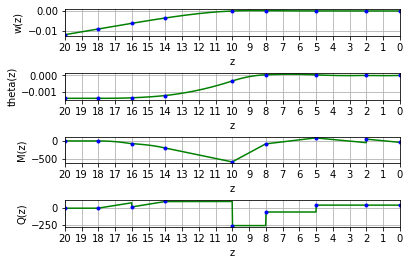

In [162]:
#Прогиб
import matplotlib.pyplot as plt
plt.subplot (7, 1,1)
ax = plt.gca() 
ax.invert_xaxis()
y = np.array(list( map( lambda x :W(x), z ) ))
y1 = np.array(list( map( lambda x :W(x), z1 )))
plt.plot( z, y, 'g-', z1, y2, 'b.')
plt.xlabel( "z" ); 
plt.ylabel( "w(z)");
#plt.title ("Прогиб");
plt.grid()
plt.xticks( list( range(0, h+1, 1) ) );
#Угол
plt.subplot (7, 1,3)
ax = plt.gca() 
ax.invert_xaxis() 
y = np.array(list( map( lambda x :th(x), z ) ))
y1 = np.array(list( map( lambda x :th(x), z1 ) ))
plt.plot( z, y, 'g-', z1, y1, 'b.')
plt.xlabel( "z" ); 
plt.ylabel( "theta(z)");
#plt.title ("Угол");
plt.grid()
plt.xticks( list( range(0, h+1, 1) ) );
#Момент
plt.subplot (7, 1, 5)
ax = plt.gca() 
ax.invert_xaxis()
y = np.array(list( map( lambda x :M(x), z ) ))
y1 = np.array(list( map( lambda x :M(x), z1 ) ))
plt.plot( z, y, 'g-', z1, y1, 'b.')
plt.xlabel( "z" ); 
plt.ylabel( "M(z)");
#plt.title ("Момент");
plt.grid()
plt.xticks( list( range(0, h+1, 1) ) );
#Перерезывающая сила
plt.subplot (7, 1, 7)
y = np.array(list( map( lambda x :Q(x), z ) ))
y1 = np.array(list( map( lambda x :Q(x), z1 ) ))
ax = plt.gca() 
ax.invert_xaxis()
plt.plot( z, y, 'g-', z1, y1, 'b.')
plt.xlabel( "z" ); 
plt.ylabel( "Q(z)");
#plt.title ("Перерезывающая сила");
plt.grid()
plt.xticks( list( range(0, h+1, 1) ) );

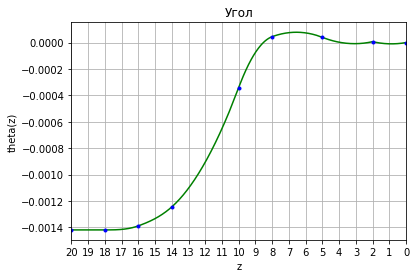

In [148]:
#Угол
ax = plt.gca() 
ax.invert_xaxis() 
y = np.array(list( map( lambda x :th(x), z ) ))
y1 = np.array(list( map( lambda x :th(x), z1 ) ))
plt.plot( z, y, 'g-', z1, y1, 'b.')
plt.xlabel( "z" ); 
plt.ylabel( "theta(z)");
plt.title ("Угол");
plt.grid()
plt.xticks( list( range(0, h+1, 1) ) );

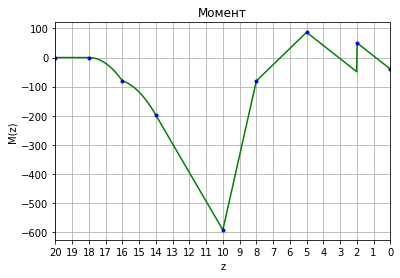

In [163]:
#Момент

ax = plt.gca() 
ax.invert_xaxis()
y = np.array(list( map( lambda x :M(x), z ) ))
y1 = np.array(list( map( lambda x :M(x), z1 ) ))
#pylab.subplot (4, 1, 3)
plt.plot( z, y, 'g-', z1, y1, 'b.')
plt.xlabel( "z" ); 
plt.ylabel( "M(z)");
plt.title ("Момент");
plt.grid()
plt.xticks( list( range(0, h+1, 1) ) );

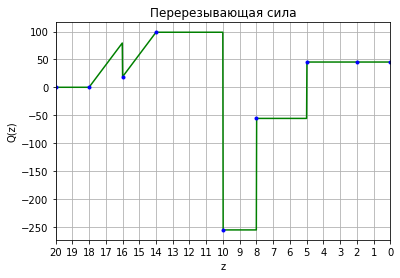

In [164]:
y = np.array(list( map( lambda x :Q(x), z ) ))
y1 = np.array(list( map( lambda x :Q(x), z1 ) ))
ax = plt.gca() 
ax.invert_xaxis()
plt.plot( z, y, 'g-', z1, y1, 'b.')
plt.xlabel( "z" ); 
plt.ylabel( "Q(z)");
plt.title ("Перерезывающая сила");
plt.grid()
plt.xticks( list( range(0, h+1, 1) ) );

In [58]:
j=[1,2,3,4,5,6,7,8,9,10,5]
j1= list( range(0, len(j), 1) )
j1
def skol(x):
    k=j.index(x)
    skol=np.mean(np.array( j[k:k+2]) )    
    return skol
i=list(map(lambda x:skol(x),j))
j1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]